In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM

zmin = 0
zmax = 1
survey_area = 0.11 # square degrees zfourge
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
mlim = 27 # CDFS apparent magnitude limit

# Read in CDFS main data
data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1]
df = df[df['zpk'] >= zmin]
df = df[df['zpk'] <= zmax]
df = df[df['FKs'] >= 0]
print(f'Number of sources: {len(df)}')

z = df['zpk'] # redshift
m_app = df['FKs'] # apparent magnitude

Number of sources: 4349


In [2]:
# m-M = 5 log d + 25
dists = cosmo.luminosity_distance(z) * 10 ** 6 # Mpc -> pc
m_ab = 25 - 2.5*np.log10(m_app) # apparent magnitude -> AB magnitude
M_abs = m_ab - 5 * np.log10(dists / 10) # AB magnitude -> absolute magnitude

# mlim_ab = 25 - 2.5*np.log10(mlim) # apparent magnitude limit -> AB magnitude
# print(mlim_ab)

[-25.48339928 -24.68770983 -23.89202037 -23.09633091 -22.30064145
 -21.504952   -20.70926254 -19.91357308 -19.11788362 -18.32219416
 -17.52650471 -16.73081525 -15.93512579 -15.13943633 -14.34374687
 -13.54805742 -12.75236796 -11.9566785  -11.16098904 -10.36529958
  -9.56961013]
Number of galaxies in each bin: [  3.  41. 107. 167. 218. 268. 375. 563. 719. 708. 472. 326. 200.  97.
  47.  23.   8.   4.   1.   2.]


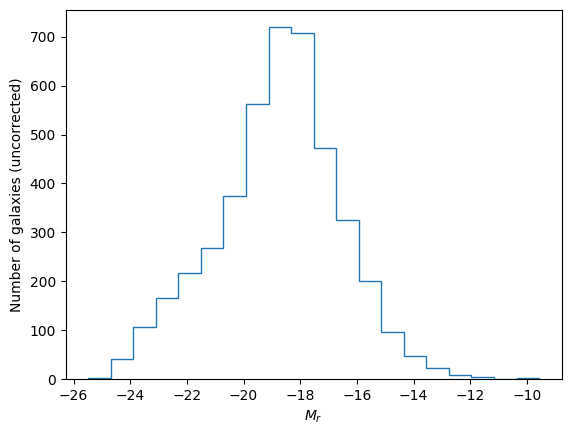

In [4]:
counts, bin_edges, _ = plt.hist(M_abs, bins=20, histtype='step')
print(bin_edges)
plt.xlabel('$M_r$')
plt.ylabel('Number of galaxies (uncorrected)')
print('Number of galaxies in each bin:', counts)

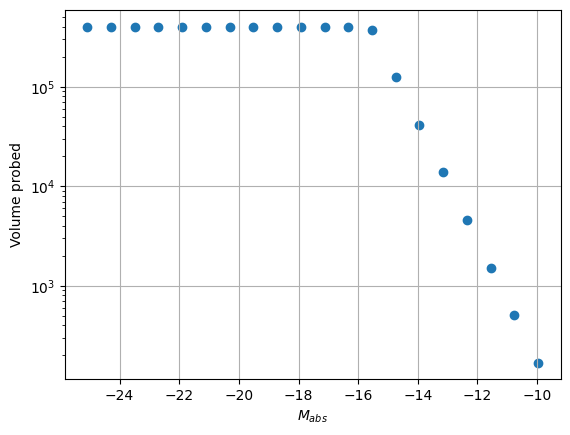

dmaxs: [3303.82880589 3303.82880589 3303.82880589 3303.82880589 3303.82880589
 3303.82880589 3303.82880589 3303.82880589 3303.82880589 3303.82880589
 3303.82880589 3303.82880589 3217.03815756 2230.06910217 1545.89655357
 1071.62426133  742.85601764  514.9520059   356.96765199  247.45200156]
vol: [4.02789707e+05 4.02789707e+05 4.02789707e+05 4.02789707e+05
 4.02789707e+05 4.02789707e+05 4.02789707e+05 4.02789707e+05
 4.02789707e+05 4.02789707e+05 4.02789707e+05 4.02789707e+05
 3.71872783e+05 1.23874159e+05 4.12635933e+04 1.37452730e+04
 4.57867371e+03 1.52519727e+03 5.08056890e+02 1.69238306e+02]
dmin: 0.0


In [45]:
# Calculate the central value of each luminosity bin
bin_centers = bin_edges[0:-1] + np.diff(bin_edges)[0] / 2

# Calculate the minimum and maximum distance of the redshift bin
dmin = cosmo.comoving_distance(zmin).value # Mpc
dmax = cosmo.comoving_distance(zmax).value # Mpc

# Calculate the maximum distance of each luminosity bin
dmaxs = (10 * 10 ** ((mlim - bin_centers) / 5)) / 10 ** 6 # Mpc

# If the maximum distance is greater than the maximum redshift bin distance, set it to the maximum redshift bin distance
dmaxs[dmaxs > dmax] = dmax

# Calculate the minimum volume of the redshift bin
vmin = 4/3 * np.pi * dmin**3

# Calculate the maximum volume of each luminosity bin
vmaxs = 4/3 * np.pi * dmaxs**3

# Total volume probed accounting for survey area
vol = (vmaxs - vmin) * survey_area / (41253)

# Plot the volume probed as a function of absolute magnitude
plt.scatter(bin_centers, vol)
plt.yscale('log')
plt.xlabel(r'$M_{abs}$')
plt.ylabel('Volume probed')
plt.grid()
plt.show()

print(f'dmaxs: {dmaxs}')
print(f'vol: {vol}')
print(f'dmin: {dmin}')

Text(0, 0.5, '$\\phi$')

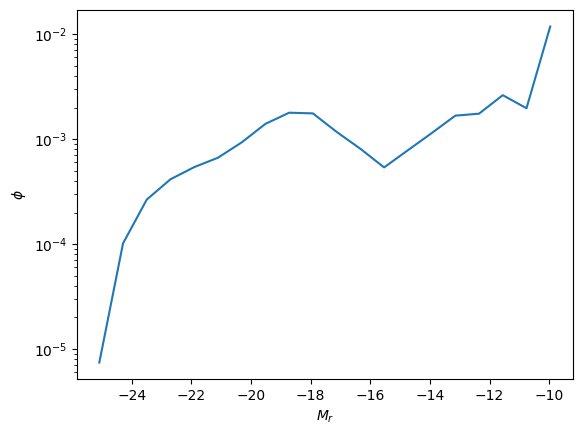

In [48]:
# corrected luminosity function

mask = counts > 10

lf=counts/vol
plt.plot(bin_centers,lf)

# plt.xlim(-25,-16.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi$')